In [2]:
"""setup information"""
%load_ext autoreload
%autoreload complete
import torch
import numpy as np
import matplotlib.pyplot as plt
import importlib as imp
# specific classes for training, validating, and testing, 
# as described in LearningToBalance original code
train_class_names = [
    'train', 'skyscraper', 'turtle', 'raccoon', 'spider', 'orange', 'castle', 'keyboard',
    'clock', 'pear', 'girl', 'seal', 'elephant', 'apple', 'aquarium_fish', 'bus',
    'mushroom', 'possum', 'squirrel', 'chair', 'tank', 'plate', 'wolf', 'road', 'mouse',
    'boy', 'shrew', 'couch', 'sunflower', 'tiger', 'caterpillar', 'lion', 'streetcar',
    'lawn_mower', 'tulip', 'forest', 'dolphin', 'cockroach', 'bear', 'porcupine', 'bee',
    'hamster', 'lobster', 'bowl', 'can', 'bottle', 'trout', 'snake', 'bridge',
    'pine_tree', 'skunk', 'lizard', 'cup', 'kangaroo', 'oak_tree', 'dinosaur', 'rabbit',
    'orchid', 'willow_tree', 'ray', 'palm_tree', 'mountain', 'house', 'cloud'
    ]
valid_class_names = [
    'otter', 'motorcycle', 'television', 'lamp', 'crocodile', 'shark', 'butterfly', 'sea',
    'beaver', 'beetle', 'tractor', 'flatfish', 'maple_tree', 'camel', 'crab', 'cattle'
    ]
test_class_names = [
    'baby', 'bed', 'bicycle', 'chimpanzee', 'fox', 'leopard', 'man', 'pickup_truck',
    'plain', 'poppy', 'rocket', 'rose', 'snail', 'sweet_pepper', 'table', 'telephone',
    'wardrobe', 'whale', 'woman', 'worm'
    ]
# 
LABEL_NAMES : list[str] = ['apple', 'aquarium_fish', 'baby', 'bear', 'beaver', 'bed', 'bee', 'beetle', 'bicycle', 'bottle', 'bowl', 'boy', 'bridge', 'bus', 'butterfly', 'camel', 'can', 'castle', 'caterpillar', 'cattle', 'chair', 'chimpanzee', 'clock', 'cloud', 'cockroach', 'couch', 'crab', 'crocodile', 'cup', 'dinosaur', 'dolphin', 'elephant', 'flatfish', 'forest', 'fox', 'girl', 'hamster', 'house', 'kangaroo', 'keyboard', 'lamp', 'lawn_mower', 'leopard', 'lion', 'lizard', 'lobster', 'man', 'maple_tree', 'motorcycle', 'mountain', 'mouse', 'mushroom', 'oak_tree', 'orange', 'orchid', 'otter', 'palm_tree', 'pear', 'pickup_truck', 'pine_tree', 'plain', 'plate', 'poppy', 'porcupine', 'possum', 'rabbit', 'raccoon', 'ray', 'road', 'rocket', 'rose', 'sea', 'seal', 'shark', 'shrew', 'skunk', 'skyscraper', 'snail', 'snake', 'spider', 'squirrel', 'streetcar', 'sunflower', 'sweet_pepper', 'table', 'tank', 'telephone', 'television', 'tiger', 'tractor', 'train', 'trout', 'tulip', 'turtle', 'wardrobe', 'whale', 'willow_tree', 'wolf', 'woman', 'worm']


In [3]:
import Data
imp.reload(Data)
number_of_inner_gradient_steps: int = 5
ways: int = 5
shots: int = 7
query: int = 3
total_test_task = 20
batch_size = 4
d = Data.get_dataloader(test_class_names,  shots, query, ways, total_test_task,  batch_size)
for i, task_batch in enumerate(d):
    for task in task_batch:
        print(f"task: {task.shape}")
    # print(f"batch: {len(task_batch)}")
    # a, b, c, d = task_batch
    # print(f"a: {a.shape}")
    # print(f"b: {b.shape}")
    # print(f"c: {c.shape}")
    # print(f"d: {d.shape}")
    # f, ax = plt.subplots(figsize=(4, 4))
    # image = np.asarray(a[0][1].reshape([32, 32, 3]).cpu(), dtype=int)
    # print(f"image: {image.shape}, dtype: {image.dtype}")
    # ax.imshow(np.asarray(image))
    # ax.set_title(str(b[0][1].cpu()))
    # # print(image[0:1])
    break

task: torch.Size([4, 35, 3, 32, 32])
task: torch.Size([4, 35])
task: torch.Size([4, 15, 3, 32, 32])
task: torch.Size([4, 15])


In [2]:
import model
import Data
imp.reload(Data)
imp.reload(model)
number_of_inner_gradient_steps: int = 5
ways: int = 5
shots: int = 20
query: int = 7
total_train_task = 112
total_valid_task = 48
total_test_task = 64
inner_learning_rate: float = 1e-5
outer_learning_rate: float = 1e-2
batch_size = 16
m = model.LearningToBalance(data_name='cifar', number_of_inner_gradient_steps=number_of_inner_gradient_steps, 
        ways=ways, shots=shots, inner_learning_rate=inner_learning_rate, outer_learning_rate=outer_learning_rate, batch_size=batch_size)
train_loss, valid_loss, train_accuracy, valid_accuracy = m.train(
        train_dataloader=Data.get_dataloader(train_class_names, shots, query, ways, total_train_task, batch_size),
        valid_dataloader=Data.get_dataloader(valid_class_names, shots, query, ways, total_valid_task, batch_size))
test_loss, test_accuracy = m.test(
        test_dataloader= Data.get_dataloader(test_class_names,  shots, query, ways, total_test_task,  batch_size))

/home/jason/anaconda3/envs/new/lib/python3.11/site-packages/torch/nn/modules/lazy.py:180: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment.
  warnings.warn('Lazy modules are a new feature under heavy development '


model, get_parameter, generating params theta
model, get_parameter, generating params alpha
T-R-A-I-N
train_dataloader length? 7
valid_dataloader length? 3


/home/jason/ml/LearningToBalance_pytorch/Jason_Pytorch/model.py:307: UserWarning: Anomaly Detection has been enabled. This mode will increase the runtime and should only be enabled for debugging.
  with autograd.detect_anomaly():


OutOfMemoryError: CUDA out of memory. Tried to allocate 14.00 MiB (GPU 0; 47.54 GiB total capacity; 12.57 GiB already allocated; 15.75 MiB free; 14.02 GiB reserved in total by PyTorch) If reserved memory is >> allocated memory try setting max_split_size_mb to avoid fragmentation.  See documentation for Memory Management and PYTORCH_CUDA_ALLOC_CONF

Text(0.5, 1.0, 'test loss')

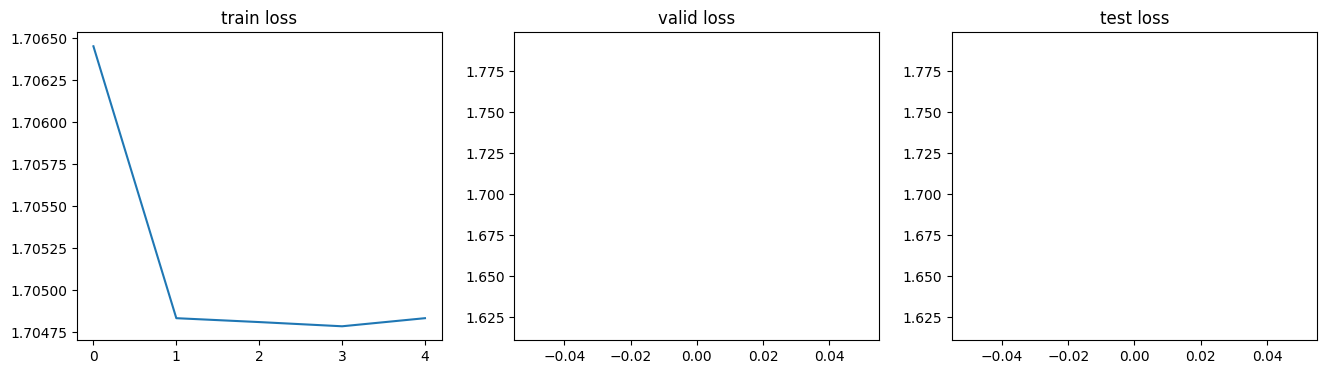

In [ ]:
f, ax = plt.subplots(figsize=(16, 4), nrows=1, ncols=3)
ax[0].plot(train_loss)
ax[0].set_title("train loss")
ax[1].plot(valid_loss)
ax[1].set_title("valid loss")
ax[2].plot(test_loss)
ax[2].set_title("test loss")